# Direct Forcing Method
---
### Author: Marin Lauber

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import NSsolver as ns
try:
    plt.style.use("jupyter")
except OSError:
    print("Delaut syle in use")

Direct Forcing methods, see [Fadlun et al. (2000)](https://www.sciencedirect.com/science/article/pii/S0021999100964842), enforce the kinematic boundary condition by changing which equations are solved localy. This is done by adding a forcing term to the momentum equation that drives the fluid to the correct boundary condition in the solid. 

$$
    \frac{\partial\vec{u}}{\partial t} + (\vec{u}\cdot\nabla)\vec{u} = -\frac{1}{\rho} + \nu\nabla^2\vec{u} + \vec{f}\\
$$

This forcing term is computed such that the intermediate velocity satisfies the boundary condition on the interfce between the solid and the fluid. When a fractionnal step method is used, the focing becomes

$$
    \vec{f} = \begin{cases}
    -\vec{r}_{\Delta t}(\vec{u}^n) + \nabla p^n + \frac{\vec{V}^{n+1} - \vec{u}^n}{\Delta t}&  \text{in } \Omega_f\\
    0 & \text{in } \Omega_b,\\
    \end{cases}
$$

which is added to the intermediate velocity field

$$
    \vec{u}^* = \vec{u}^n + \vec{r}_{\Delta t}(\vec{u}^n) + \Delta t\vec{f}.
$$

With the forcing described earlier, we recover $u^* = V^{n+1}$ in $\Omega_b$. We define the body as cells a distance $\pm 1$ from each side of the interface. This results in a shapr change from body to fluid but this will not cause any issue in our simple 1D case.

In [8]:
def body(d, t=2):
    return np.where(abs(d)<=t//2, 0, 1)

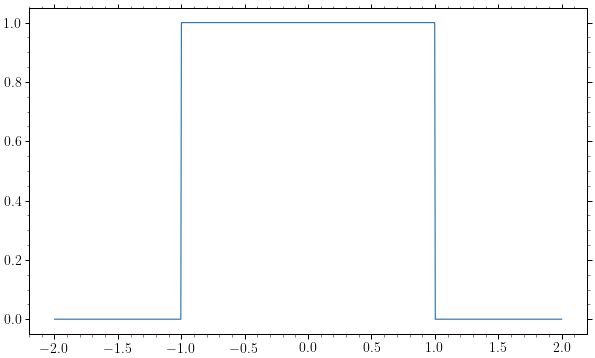

In [16]:
d = np.linspace(-2,2,1024)
plt.plot(d, 1-body(d));

The momentum and continuity equations are solved following the fractional-step approach. The only modification here is on the intermediate velocity step, where the forcing is added. The pressure projection and correction steps are left unchanged.

In [17]:
def update(d, u0, V, dx, dt=1, rho=1):
    
    u_n = u0
    delta = body(d)
        
    # first step
    u_star = delta*(u_n + dt*ns.r(u_n)) + (1-delta)*V

    sigma = ns.div(u_star, dx)

    p = ns.solve_pressure(np.ones_like(sigma), sigma, dx, verbose=True)

    u_n = u_star - dt/rho*(ns.grad(p, dx))
    
    return u_star, sigma, p, u_n

In [18]:
N = 32
x, dx = np.linspace(-1, 1, N, retstep=True)
xs = x + 0.5*dx # scalar cell-centred values
X = 0.0
V = 1
u0 = np.zeros_like(x)
dt = 1.
d = (x-X)/dx

us, sigma, p, u_n = update(d, u0, V, dx, dt)
print("Interface at X: %.2f" % X)
print(r"L inf: %.3e" % np.max(np.abs(u_n -  V)))

Jacobi solver:
	res0: 6.850e-01
 	res: 6.780e-11
 	iter: 548
Interface at X: 0.00
L inf: 9.375e-01


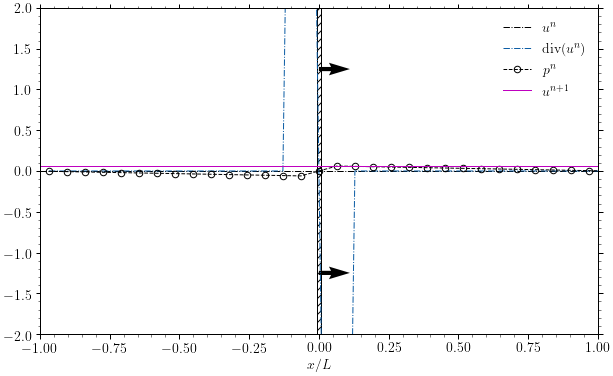

In [19]:
ns.draw_results(x, xs, X, u0, u_n, p, sigma)